<a href="https://colab.research.google.com/github/Harshcs21/1BM21CS073_ML_lab/blob/main/linear_and_multiple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import warnings
import warnings
warnings.filterwarnings("ignore")

# We will use some methods from the sklearn module
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score

In [14]:
df = pd.read_csv('/content/multiple_linear_regression_dataset.csv')
df.head()

,age,experience,income
0,25,1,30450
1,30,3,35670
2,47,2,31580
3,32,5,40130
4,43,10,47830


In [9]:

def linear(X, b0, b1):
    return [b0+b1*x for x in X]

In [10]:
# b0 - Intercept
def intercept(X, Y, b1):
    x_ = np.mean(X)
    y_ = np.mean(Y)

    return y_-b1*x_

In [11]:
# b1 - Slope
def slope(X, Y):
    x_ = np.mean(X)
    y_ = np.mean(Y)

    rise = sum([(x-x_) * (y-y_) for x,y in zip(X,Y)])
    run = sum([(x-x_)**2 for x,y in zip(X,Y)])

    return rise / run

In [15]:
predictor = df['age']
target = df['income']

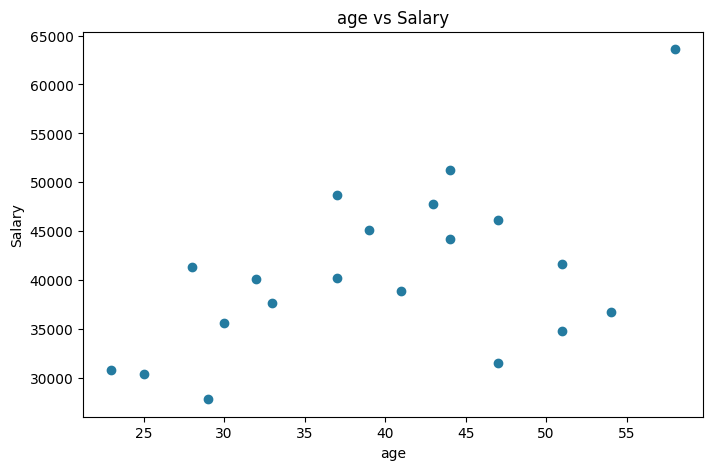

In [18]:
plt.figure(figsize=(8,5))
plt.title("age vs Salary")
plt.scatter(predictor, target, color = "#247ba0")
plt.xlabel('age')
plt.ylabel('Salary')
plt.show()

In [17]:
b1 = slope(predictor, target)
b0 = intercept(predictor, target, b1)
predicted = linear(predictor, b0, b1)

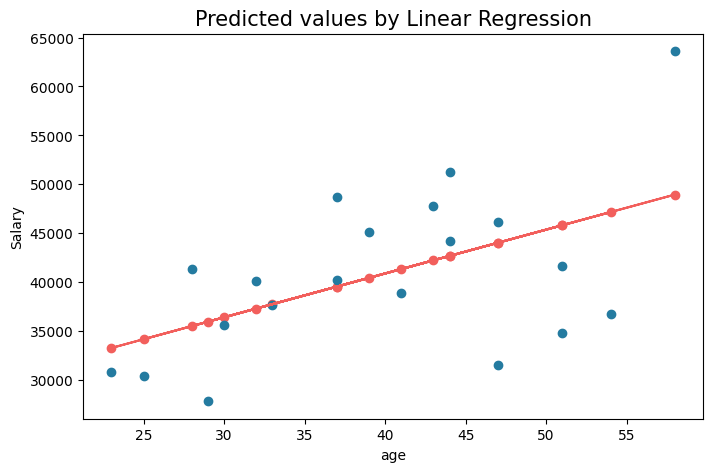

In [19]:
plt.figure(figsize = (8, 5))
plt.plot(predictor, predicted, color = '#f25f5c')
plt.scatter(predictor, predicted, color = '#f25f5c')  #Red line is predicted data
plt.title('Predicted values by Linear Regression', fontsize = 15)
plt.xlabel('age')
plt.ylabel('Salary')
plt.scatter(predictor, target, color = "#247ba0")
plt.show()

In [20]:
print("Coefficients:\n=============")
print("b0 : ", b0)
print("b1 : ", b1)

Coefficients:
b0 :  22975.161864384605
b1 :  447.92782183140974


In [21]:
print(df.describe())

             age  experience        income
count  20.000000   20.000000     20.000000
mean   39.650000    6.200000  40735.500000
std    10.027725    4.124382   8439.797625
min    23.000000    1.000000  27840.000000
25%    31.500000    3.750000  35452.500000
50%    40.000000    5.000000  40190.000000
75%    47.000000    9.000000  45390.000000
max    58.000000   17.000000  63600.000000


In [23]:
X = df[['age', 'experience']]
y = df['income']

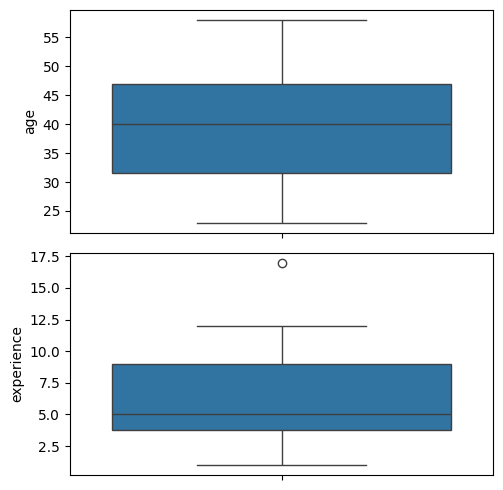

In [26]:
fig, axs = plt.subplots(2, figsize = (5,5))
plt1 = sns.boxplot(df['age'], ax = axs[0])
plt2 = sns.boxplot(df['experience'], ax = axs[1])
plt.tight_layout()

<ipython-input-27-1e9df3026eb9>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['income']);


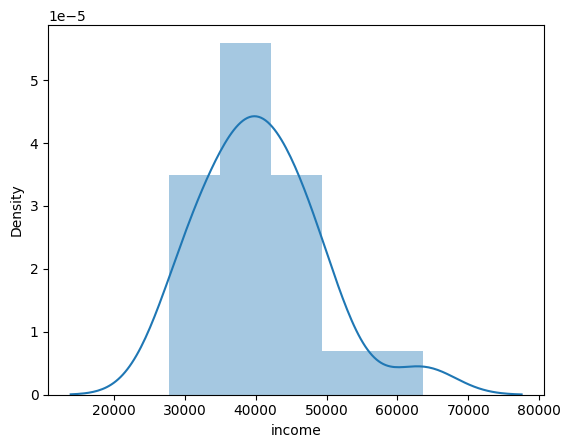

In [27]:
sns.distplot(df['income']);

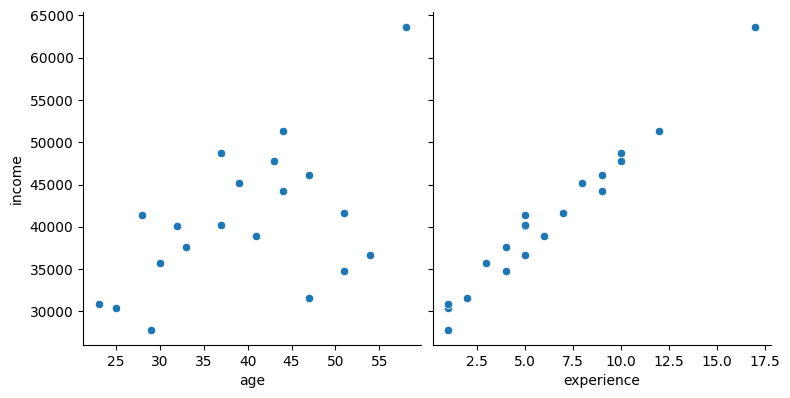

In [28]:
sns.pairplot(df, x_vars=['age', 'experience'], y_vars='income', height=4, aspect=1, kind='scatter')
plt.show()

In [29]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

In [30]:
y_train.shape

(14,)

In [31]:
y_test.shape

(6,)

In [35]:
reg_model = linear_model.LinearRegression()

In [36]:
reg_model = LinearRegression().fit(X_train, y_train)

In [37]:
print('Intercept: ',reg_model.intercept_)
# pair the feature names with the coefficients
list(zip(X, reg_model.coef_))

Intercept:  30510.643844104634


[('age', -79.68088640690299), ('experience', 2167.573549181646)]

In [38]:
y_pred= reg_model.predict(X_test)
x_pred= reg_model.predict(X_train)

In [39]:
print("Prediction for test set: {}".format(y_pred))

Prediction for test set: [30845.55700593 49238.18653887 46273.80412562 46512.84678484
 35117.21283408 39117.44677062]


In [40]:
reg_model_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
reg_model_diff

,Actual value,Predicted value
17,30870,30845.557006
19,48700,49238.186539
11,46110,46273.804126
18,44190,46512.846785
13,34800,35117.212834
6,41340,39117.446771


In [41]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('Mean Absolute Error:', mae)
print('Mean Square Error:', mse)
print('Root Mean Square Error:', r2)

Mean Absolute Error: 931.5077511414116
Mean Square Error: 1792176.3379165696
Root Mean Square Error: 1338.7219046226776
